### <p style="text-align: right;"> &#9989; **Group 1 (GoGreen)** </p>
#### <p style="text-align: right;"> &#9989; Beth, Zhongjie, McKena, Erik</p>

# Module 1



## How do SNPs relate to gene transcription?

We will work with maize. Last updated 2020/01/23

Jupyter by default converts `tabs` into `spaces` which is good.

First, import the usual libraries
- `math`: basic math operations
- `os`: enable file manipulation with the OS
- `sys`: enable interaction with commandline
- `glob`: more variable manipulation
- `matplotlib.pyplot`: default plotter (I personally like ggplot waaaaay better. E)
    - `inline`: so that plots are shown in the notebook
- `seaborn`: nicer plots
- `numpy`: all number cruching done here
- `pandas`: data wrangling

In [1]:
import math  
import os   
import glob 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import numpy as np
import pandas as pd
from scipy import stats


Define some functions. Let's see for how long can we keep tidy commented code.

In [2]:
# Path to the folder where all the raw data is located
src = '/home/ejam/documents/css893/GoGreen/sample_data/'

# Path where we will save outputs
dst = '/home/ejam/documents/css893/output/'

# Matrix with raw SNP data
file_snp_raw = 'snp_imputed_chr10_sample.csv'

# Matrix with imputed SNP data
file_snp_imp = 'snp_imputed_chr10_sample.csv'

# Matrix with gene expression (FPKM)
file_gen = 'gene_w_features_chr10.csv'

Read the SNP matrix

In [6]:
snp_matrix_imputed = pd.read_csv(src + file_snp_imp, dtype={'chrom': int})
snp_matrix_imputed

,chrom,pos,764,779,787,790,793,904,911,912,...,YANG,YE_4,YE-CHI-HUNG,YELLOW_3-4,YING-55,Yong_28,Yu796_NS,ZS01250,ZS1791,ZS635
0,10,95800527,C,C,C,C,C,C,C,C,...,C,C,C,C,C,C,C,C,C,C
1,10,95800923,G,A,A,A,G,A,A,A,...,G,A,A,A,A,A,A,G,G,G
2,10,95800952,A,A,A,A,A,A,A,A,...,A,A,A,A,A,A,A,A,A,A
3,10,95800959,C,C,C,C,C,C,C,C,...,C,C,C,C,C,C,C,C,C,C
4,10,95801220,A,A,A,A,A,A,A,A,...,A,A,A,A,A,A,A,A,A,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,10,115203353,G,G,G,G,G,G,G,G,...,G,G,G,G,T,G,G,T,G,G
4996,10,115203368,A,A,A,A,A,A,A,A,...,A,A,A,A,A,A,A,A,A,A
4997,10,115204710,T,C,C,T,T,C,C,C,...,C,C,C,C,C,T,T,C,T,T
4998,10,115204722,T,T,T,T,T,T,T,T,...,T,T,T,T,C,T,T,C,T,T


Now let's explore the expression data!!

We have 2987 rows × 947 columns in total.
- Rows: FPKM for the same gene across all 942 cultivars
- Columns: 5 columns of metadata + 942 cultivars

In [7]:
fpkm = pd.read_csv(src+file_gen)
fpkm

,gene,chromosome,feature_type,position_left,position_right,LH128,DKMBZA,CQ806,DKF274,Ill.Hy,...,NC328,NC326,PHV53,DKIBC2,A641,WIL900,Va22,E8501,PHP85,Oh43
0,Zm00001d024742,10,gene,85863323,85863746,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Zm00001d025653,10,gene,125107973,125113328,9.350780,9.954800,7.735490,10.360900,9.072890,...,4.685600,3.870230,5.278490,5.178290,3.802910,6.446750,5.618580,3.980550,4.175450,4.500850
2,Zm00001d024903,10,gene,93908316,93911235,0.954312,0.335773,0.689938,0.106595,0.200660,...,1.809510,1.671710,2.940510,1.523060,7.885560,4.522500,1.478990,9.566990,6.826610,0.509826
3,Zm00001d023618,10,gene,12298031,12300071,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Zm00001d024825,10,gene,89733155,89739279,0.857062,0.689824,0.613990,1.146330,1.137050,...,0.617702,0.317978,0.354413,0.412837,0.495563,0.312885,0.616760,0.450897,0.610228,0.472077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2982,Zm00001d023459,10,gene,6289475,6298739,7.743020,12.641800,10.975500,12.337900,15.497200,...,7.251110,13.711400,15.806400,16.518300,6.885620,22.863300,8.189910,6.772000,7.192290,10.332200
2983,Zm00001d026184,10,gene,140529821,140530718,0.437610,0.361114,0.366553,0.512719,0.149871,...,0.742883,0.587186,2.192500,0.110062,1.083900,1.572130,0.272518,0.154927,0.975337,0.605777
2984,Zm00001d024000,10,gene,35675291,35679293,38.797700,28.401200,3.048510,4.423800,8.698070,...,0.093581,2.816500,5.026650,3.186000,0.373411,18.871700,0.000000,0.000000,9.644770,33.329400
2985,Zm00001d025251,10,gene,111149588,111152196,0.081500,0.000000,0.068706,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.046316,0.062825,0.000000,0.000000,0.252784,0.000000,0.033119


FPKM can be easily converted to TPM by dividing each FPKM value by the sum of all FPKM values of the respective sample, and multiplying this by 1e6. This yields TPM

In [8]:
total_exp = fpkm.iloc[:, 5:].sum(axis='index')
tpm = fpkm.iloc[:, 5:]*1e6
tpm = tpm.div(other=total_exp, axis='columns')
tpm

,LH128,DKMBZA,CQ806,DKF274,Ill.Hy,LH162,DKWDAD1,H105W,L222,PHHB4,...,NC328,NC326,PHV53,DKIBC2,A641,WIL900,Va22,E8501,PHP85,Oh43
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,189.506595,261.983538,167.684262,253.040916,224.313529,275.336702,166.955091,187.486662,296.027161,198.988429,...,106.068226,79.385036,105.279689,113.680289,80.412785,143.121705,115.768295,84.420322,77.637823,90.144794
2,19.340463,8.836641,14.955968,2.603335,4.961016,27.759864,2.206053,2.291979,10.087266,14.960538,...,40.961993,34.289631,58.648587,33.436115,166.740691,100.402204,30.473919,202.898688,126.933177,10.210996
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,17.369556,18.154311,13.309624,27.996448,28.111847,16.584633,19.635756,17.736032,19.828836,19.988898,...,13.982960,6.522273,7.068781,9.063113,10.478713,6.946234,12.708060,9.562716,11.346507,9.454944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2982,156.923097,332.698145,237.918815,301.324549,383.144911,133.736242,171.979304,105.649796,343.939341,190.672884,...,164.143839,281.244261,315.259265,362.630351,145.596893,507.578931,168.749385,143.621966,133.732588,206.937364
2983,8.868777,9.503548,7.945866,12.521971,3.705335,20.414475,5.310212,13.227242,10.077015,0.000000,...,16.816690,12.044189,43.729498,2.416218,22.919138,34.902226,5.615110,3.285724,18.135301,12.132740
2984,786.289487,747.443129,66.083357,108.041039,215.046670,148.416419,159.188164,185.696017,1118.820979,881.939039,...,2.118395,57.771231,100.256731,69.943051,7.895800,418.963024,0.000000,0.000000,179.333710,667.534329
2985,1.651715,0.000000,1.489356,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.016784,1.328441,0.000000,0.000000,5.361095,0.000000,0.663318


Compute the z scores of a given dataframe. The data frame can be either FPKM or TPM values. Refer to Hart _et al._ "Finding the active genes in deep RNA-seq gene expression studies" _BMC Genomics_ 2013

In [3]:
def z_score_sample(sample, cutoff=2**-15, kernel='scott', num=1024):
    """
    Computes the Z-scores of a given sample (cultivar). 
    Do NOT use it directly but with the z_score function.
    
    Parameters
    ----------
    sample : array-like
        Expression levels of all genes of a fixed cultivar/individual
    
    cutoff : scalar
        Genes whose expression is lower than the cutoff value will be considered as non-expressed
    
    kernel : str, callable
        bandwidth method for the Gaussian KDE. Look scipy.stats.gaussian_kde for more documentation.
    
    num : int
        Resolution to distinguish the mean of the KDE distribution
    
    Returns
    -------
    zFPKM : array-like
        Array with the z-scores of the sample
         
    mu : float
        Mean value from the fitted Gaussian distribution
         
    U : float
        Mean value of the expression levels above the 50% quantile
    
    sigma : float
        STD of the fitted Gaussian distribution
    
    """
    sample = sample[sample > cutoff]
    sample = np.log2(sample)
    kde = stats.gaussian_kde(sample)
    x = np.linspace(start=sample.min(), stop=sample.max(), num=num)
    y = kde(x)
    mu = x[np.argmax(y)]
    
    U = np.mean(sample[sample > mu])
    
    sigma = (U - mu) * math.sqrt(0.5*math.pi)
    
    zFPKM = (sample - mu) / sigma
    
    return zFPKM, mu, U, sigma

def z_score(df, skip=0, cutoff=-15, kernel='scott', num=1024):
    """
    df : dataframe
        Data frame containing gene expression values.
        Rows must be genes while columns are different individuals
    
    skip : scalar
        Number of metadata columns to skip from the beginning of the dataframe
    
    cutoff : scalar
        Genes with expression less than 2^cutoff will be considered nonexpressed
        
    kernel : str, callable
        bandwidth method for the Gaussian KDE. Look scipy.stats.gaussian_kde for more documentation.
    
    num : int
        Resolution to distinguish the mean of the KDE distribution
    
    Returns
    -------
    zcopy = dataframe
        A copy of the original dataframe with z-scores in place
    """
    
    zcopy = df.copy()
    for col in zcopy.columns[skip:]:
        z,mu,U,sigma = z_score_sample(df[col], cutoff=2**cutoff, kernel=kernel, num=num)
        zcopy[col] = cutoff
        zcopy.loc[z.index, col] = z
    return zcopy

Example of Z-scores for cultivar `NC328`

mu = 7.0403441764609145
U = 8.873751301743221
sigma = 2.2978350695712852


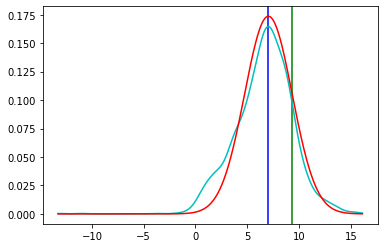

In [26]:
z,mu,U,sigma = z_score_sample(tpm['NC328'])

sample = tpm['NC328'][tpm['NC328'] > 2**-15].copy()
sample = np.log2(sample)
kde = stats.gaussian_kde(sample)
x = np.linspace(start=sample.min(), stop=sample.max(), num=1024)
w = np.random.normal(mu,sigma,)
print('mu =', mu)
print('U =', U)
print('sigma =', sigma)
plt.axvline(mu, c='b')
#plt.axvline(U, c='g')
plt.axvline(mu+sigma, c='g')
plt.plot(x,kde(x), c='c')
plt.plot(x, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (x - mu)**2 / (2 * sigma**2)), c='r')

Computing z-scores of FPKM

In [159]:
zfpkm = z_score(fpkm, skip=5)
zfpkm

,gene,chromosome,feature_type,position_left,position_right,LH128,DKMBZA,CQ806,DKF274,Ill.Hy,...,NC328,NC326,PHV53,DKIBC2,A641,WIL900,Va22,E8501,PHP85,Oh43
0,Zm00001d024742,10,gene,85863323,85863746,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,...,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000
1,Zm00001d025653,10,gene,125107973,125113328,-0.024399,0.145253,-0.082046,0.137629,-0.011292,...,-0.133157,-0.478906,-0.092693,-0.235519,-0.363044,-0.151787,-0.140024,-0.374654,-0.456824,-0.289027
2,Zm00001d024903,10,gene,93908316,93911235,-1.661502,-2.240443,-1.750591,-3.094485,-2.803231,...,-0.730240,-1.053271,-0.461148,-1.081560,0.112201,-0.394511,-1.016071,0.207278,-0.129299,-1.738770
3,Zm00001d023618,10,gene,12298031,12300071,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,...,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000
4,Zm00001d024825,10,gene,89733155,89739279,-1.738600,-1.733653,-1.831102,-1.417055,-1.532622,...,-1.404744,-2.188785,-1.793673,-1.984063,-1.691045,-2.223260,-1.590141,-1.819986,-1.738088,-1.789976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2982,Zm00001d023459,10,gene,6289475,6298739,-0.159736,0.313447,0.159469,0.260958,0.380875,...,0.140873,0.386549,0.598028,0.566441,0.023835,0.714979,0.107306,-0.022019,-0.094534,0.264123
2983,Zm00001d026184,10,gene,140529821,140530718,-2.220775,-2.189231,-2.187206,-1.985260,-3.017007,...,-1.288939,-1.769123,-0.646012,-2.898033,-1.181027,-1.117959,-2.126234,-2.528926,-1.425658,-1.623984
2984,Zm00001d024000,10,gene,35675291,35679293,0.996287,0.883179,-0.724872,-0.463377,-0.042197,...,-2.589062,-0.696358,-0.123481,-0.571313,-1.875478,0.583612,-15.000000,-15.000000,0.100943,1.043710
2985,Zm00001d025251,10,gene,111149588,111152196,-3.426404,-15.000000,-3.343056,-15.000000,-15.000000,...,-15.000000,-15.000000,-15.000000,-3.496435,-3.036975,-15.000000,-15.000000,-2.204028,-15.000000,-3.558620


We can immediately repeat the computation for TPMs!

In [161]:
ztpm = z_score(tpm, skip=0)
ztpm

,LH128,DKMBZA,CQ806,DKF274,Ill.Hy,LH162,DKWDAD1,H105W,L222,PHHB4,...,NC328,NC326,PHV53,DKIBC2,A641,WIL900,Va22,E8501,PHP85,Oh43
0,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,...,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000
1,-0.019698,0.145338,-0.079922,0.145175,-0.002612,0.205236,-0.092319,0.006023,0.195782,-0.038335,...,-0.135560,-0.478592,-0.086041,-0.231162,-0.368779,-0.146139,-0.145117,-0.376134,-0.461432,-0.295281
2,-1.652013,-2.240051,-1.753161,-3.090374,-2.793503,-1.391991,-3.130046,-3.035679,-2.209044,-1.887243,...,-0.732920,-1.052815,-0.453762,-1.076138,0.107531,-0.388773,-1.024032,0.206532,-0.132983,-1.746453
3,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,...,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000
4,-1.728886,-1.733326,-1.833898,-1.411162,-1.523371,-1.750583,-1.595113,-1.622540,-1.728059,-1.680219,...,-1.407737,-2.188050,-1.783632,-1.977506,-1.699757,-2.216849,-1.599980,-1.823290,-1.746314,-1.797709
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2982,-0.154639,0.313510,0.162273,0.268635,0.389408,-0.297465,-0.071502,-0.390103,0.302541,-0.068834,...,0.138597,0.386650,0.603304,0.569789,0.018967,0.720308,0.103022,-0.023054,-0.098119,0.258415
2983,-2.209650,-2.188845,-2.191004,-1.979970,-3.007199,-1.605948,-2.513287,-1.825113,-2.209768,-15.000000,...,-1.291878,-1.768492,-0.638258,-2.890325,-1.188596,-1.111955,-2.137827,-2.533125,-1.433001,-1.631554
2984,0.998003,0.883168,-0.724556,-0.456470,-0.033505,-0.224960,-0.125767,-0.000605,1.141991,1.025411,...,-2.592602,-0.695991,-0.116767,-0.566534,-1.884604,0.588989,-15.000000,-15.000000,0.097910,1.038770
2985,-3.411753,-15.000000,-3.350106,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,...,-15.000000,-15.000000,-15.000000,-3.487975,-3.048705,-15.000000,-15.000000,-2.207817,-15.000000,-3.568097


To avoid computing everything again, the results are saved in __sample_data__

In [33]:
tpm['std'] = tpm.std(axis='columns')
tpm

,LH128,DKMBZA,CQ806,DKF274,Ill.Hy,LH162,DKWDAD1,H105W,L222,PHHB4,...,NC326,PHV53,DKIBC2,A641,WIL900,Va22,E8501,PHP85,Oh43,std
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.038287
1,189.506595,261.983538,167.684262,253.040916,224.313529,275.336702,166.955091,187.486662,296.027161,198.988429,...,79.385036,105.279689,113.680289,80.412785,143.121705,115.768295,84.420322,77.637823,90.144794,71.525443
2,19.340463,8.836641,14.955968,2.603335,4.961016,27.759864,2.206053,2.291979,10.087266,14.960538,...,34.289631,58.648587,33.436115,166.740691,100.402204,30.473919,202.898688,126.933177,10.210996,72.392391
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,17.369556,18.154311,13.309624,27.996448,28.111847,16.584633,19.635756,17.736032,19.828836,19.988898,...,6.522273,7.068781,9.063113,10.478713,6.946234,12.708060,9.562716,11.346507,9.454944,8.632553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2982,156.923097,332.698145,237.918815,301.324549,383.144911,133.736242,171.979304,105.649796,343.939341,190.672884,...,281.244261,315.259265,362.630351,145.596893,507.578931,168.749385,143.621966,133.732588,206.937364,86.717108
2983,8.868777,9.503548,7.945866,12.521971,3.705335,20.414475,5.310212,13.227242,10.077015,0.000000,...,12.044189,43.729498,2.416218,22.919138,34.902226,5.615110,3.285724,18.135301,12.132740,11.624888
2984,786.289487,747.443129,66.083357,108.041039,215.046670,148.416419,159.188164,185.696017,1118.820979,881.939039,...,57.771231,100.256731,69.943051,7.895800,418.963024,0.000000,0.000000,179.333710,667.534329,380.419244
2985,1.651715,0.000000,1.489356,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.016784,1.328441,0.000000,0.000000,5.361095,0.000000,0.663318,1.734642


In [162]:
zfpkm.to_csv(dst+'zfpkm_chr10.csv', index=False)
ztpm.to_csv(dst+'ztpm_chr10.csv', index=False)